In [1]:
import pandas as pd
import numpy as np
pd.options.display.max_rows = 999
pd.options.display.max_columns = 999
import os
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
#from wordcloud import WordCloud
import pandas_profiling
import missingno as msno
import datetime
import re

## emotion detection in 2012 tweets (anxiety and negative words focus)

In [2]:
twitter1 = pd.read_csv("tweet original data/Trayvon_Tweets2012.csv",encoding = "latin1",index_col = 0)

/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/anaconda3/lib/python3.7/site-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [3]:
twitter2 = pd.read_csv("tweet original data/TrayvonTweets2013.csv",encoding = "latin1", index_col = 0)

In [4]:
def date(dates):
    delta=datetime.timedelta(days=dates)
    today=datetime.datetime.strptime('1899-12-30 00:00:00','%Y-%m-%d %H:%M:%S')+delta
    return datetime.datetime.strftime(today,'%Y-%m-%d %H:%M:%S')

In [9]:
twitter = pd.concat([twitter1,twitter2],ignore_index=True)

In [10]:
twitter = twitter.sample(n =10000)
twitter = twitter.reset_index()

In [11]:
data_msg_time=twitter[['date_posted_gmt','message']]
data_msg_time.head()

,date_posted_gmt,message
0,41679.095255,RT @hollywoodbox11: I've made the choice to ca...
1,41499.682234,RiP Trayvon Martin #FuckFlorida !!!!
2,40986.704190,"""@KingMike33: @SpikeLee RT ""I am Trayvon Marti..."
3,41148.167222,6 months ago Trayvon Martin was killed. We wil...
4,41469.877674,Everyone is having a Cow over the Trayvon bull...


In [13]:
# for i in range(len(twitter)):
#     data_msg_time['date_posted_gmt'][i]=date(data_msg_time['date_posted_gmt'][i])
## too slow

In [152]:
data_msg_time=pd.read_csv(r'/Users/alphalu/Desktop/ADL/capstone/tweet/1.csv')
data_msg_time.head()


,date_posted_gmt,message
0,4/11/12 19:35,Is tweeting every minute too much? Not hating ...
1,3/25/12 18:04,Trayvon Martin's killer George Zimmerman: 407-...
2,7/19/13 17:45,"""If Trayvon Martin was aged and armed, could h..."
3,7/30/13 15:55,Sean Bell Vs Bingo @EBCRuckerPark 2 Best Teams...
4,4/12/12 15:25,Special Prosecutor Angela Corey charges George...


In [153]:
data_msg_time['date']=pd.to_datetime(data_msg_time['date_posted_gmt'])

data_msg_time['year']=data_msg_time['date'].apply(lambda x: x.year)

data_msg_time['month']=data_msg_time['date'].apply(lambda x: x.month)

data_msg_time['day']=data_msg_time['date'].apply(lambda x: x.day)

data_msg_time.drop(['date_posted_gmt'], axis=1)
data_msg_time.head()

,date_posted_gmt,message,date,year,month,day
0,4/11/12 19:35,Is tweeting every minute too much? Not hating ...,2012-04-11 19:35:00,2012,4,11
1,3/25/12 18:04,Trayvon Martin's killer George Zimmerman: 407-...,2012-03-25 18:04:00,2012,3,25
2,7/19/13 17:45,"""If Trayvon Martin was aged and armed, could h...",2013-07-19 17:45:00,2013,7,19
3,7/30/13 15:55,Sean Bell Vs Bingo @EBCRuckerPark 2 Best Teams...,2013-07-30 15:55:00,2013,7,30
4,4/12/12 15:25,Special Prosecutor Angela Corey charges George...,2012-04-12 15:25:00,2012,4,12


In [158]:
def getweek(a,b,c):
    return datetime.date(a,b,c).isocalendar()[1]

In [154]:
data_msg_time.loc[:,'message'] = data_msg_time.loc[:,'message'].fillna('nan')
data_msg_time['week'] = data_msg_time.apply(lambda x: getweek(x['year'], x['month'],x['day']), axis=1)
data_msg_time.head()

,date_posted_gmt,message,date,year,month,day,week
0,4/11/12 19:35,Is tweeting every minute too much? Not hating ...,2012-04-11 19:35:00,2012,4,11,15
1,3/25/12 18:04,Trayvon Martin's killer George Zimmerman: 407-...,2012-03-25 18:04:00,2012,3,25,12
2,7/19/13 17:45,"""If Trayvon Martin was aged and armed, could h...",2013-07-19 17:45:00,2013,7,19,29
3,7/30/13 15:55,Sean Bell Vs Bingo @EBCRuckerPark 2 Best Teams...,2013-07-30 15:55:00,2013,7,30,31
4,4/12/12 15:25,Special Prosecutor Angela Corey charges George...,2012-04-12 15:25:00,2012,4,12,15


In [249]:
data_msg_time2012=data_msg_time[data_msg_time['year']==2012]
data_msg_time2013=data_msg_time[data_msg_time['year']==2013]
data_msg_time2014=data_msg_time[data_msg_time['year']==2014]

In [250]:
file = open("LIWC Dictionary/LIWC_dic.txt","r")

LIWC = file.readlines()
LIWC_dict = {}
for line in LIWC:
    line = line.split(',')
    category = line[0]
    words = line[1].split(' ')
    words[-1] = words[-1][:-1]
    LIWC_dict[category] = words

## explore 2012

In [252]:
tweets2012_month_count=data_msg_time2012.groupby('month').count()['message']
tweets2012_month_count

month
2        14
3     11358
4      4525
5       783
6       661
7       707
8       341
9       214
10      191
11      182
12      231
Name: message, dtype: int64

### have a look at words under the category of anxiety

In [167]:
LIWC_dict['Anx']

['afraid',
 'alarm*',
 'anxiety',
 'anxious',
 'anxiously',
 'anxiousness',
 'apprehens*',
 'asham*',
 'aversi*',
 'avoid*',
 'awkward',
 'confuse',
 'confused',
 'confusedly',
 'confusing',
 'desperat*',
 'discomfort*',
 'distraught',
 'distress*',
 'disturb*',
 'doubt*',
 'dread*',
 'dwell*',
 'embarrass*',
 'fear',
 'feared',
 'fearful*',
 'fearing',
 'fears',
 'frantic*',
 'fright*',
 'guilt',
 'guilt-trip*',
 'guilty',
 'hesita*',
 'horrible',
 'horribly',
 'horrid*',
 'horror*',
 'humiliat*',
 'impatien*',
 'inadequa*',
 'indecis*',
 'inhibit*',
 'insecur*',
 'irrational*',
 'irrita*',
 'miser*',
 'nervous',
 'nervously',
 'nervousness',
 'neurotic*',
 'obsess*',
 'overwhelm*',
 'panic*',
 'paranoi*',
 'petrif*',
 'phobi*',
 'pressur*',
 'reluctan*',
 'repress*',
 'restless*',
 'rigid',
 'rigidity',
 'rigidly',
 'risk*',
 'scare',
 'scared',
 'scares',
 'scarier',
 'scariest',
 'scaring',
 'scary',
 'shake*',
 'shaki*',
 'shaky',
 'shame*',
 'shook',
 'shy',
 'shyly',
 'shyness',

### create a function to check whether a message contains any of the word belong anxiety

In [262]:
dic=['afraid',
 'alarm',
 'anxiety',
 'anxious',
 'anxiously',
 'anxiousness',
 'apprehens',
 'asham',
 'aversi',
 'avoid',
 'awkward',
 'confuse',
 'confused',
 'confusedly',
 'confusing',
 'desperat',
 'discomfort',
 'distraught',
 'distress',
 'disturb',
 'doubt',
 'dread',
 'dwell',
 'embarrass',
 'fear',
 'feared',
 'fearful',
 'fearing',
 'fears',
 'frantic',
 'fright',
 'guilt',
 'guilt-trip',
 'guilty',
 'hesita',
 'horrible',
 'horribly',
 'horrid',
 'horror',
 'humiliat',
 'impatien',
 'inadequa',
 'indecis',
 'inhibit',
 'insecur',
 'irrational',
 'irrita',
 'miser',
 'nervous',
 'nervously',
 'nervousness',
 'neurotic',
 'obsess',
 'overwhelm',
 'panic',
 'paranoi',
 'petrif',
 'phobi',
 'pressur',
 'reluctan',
 'repress',
 'restless',
 'rigid',
 'rigidity',
 'rigidly',
 'risk',
 'scare',
 'scared',
 'scares',
 'scarier',
 'scariest',
 'scaring',
 'scary',
 'shake',
 'shaki',
 'shaky',
 'shame',
 'shook',
 'shy',
 'shyly',
 'shyness',
 'startl',
 'strain',
 'stress',
 'struggl',
 'suspicio',
 'tense',
 'tensely',
 'tensing',
 'tension',
 'terrified',
 'terrifies',
 'terrify',
 'terrifying',
 'terror',
 'threat',
 'timid',
 'trembl',
 'turmoil',
 'twitchy',
 'uncertain',
 'uncomfortabl',
 'uncontrol',
 'uneas',
 'unsettl',
 'unsure',
 'upset',
 'upsets',
 'upsetting',
 'uptight',
 'vulnerab',
 'worried',
 'worrier',
 'worries',
 'worry',
 'worrying']

In [179]:
# def check_anxiety(s):
#     for word in LIWC_dict['Anx']:
#         if word in s:
#             return 'anx'
#     return 'NA'
    

In [263]:
def check_anxiety(s):
    for word in dic:
        if word in s:
            return 'anx'
    return 'NA'
    

In [264]:
check_anxiety('stress')

'anx'

In [265]:
check_anxiety('happy')

'NA'

In [266]:
data_msg_time2012['tag'] = data_msg_time2012.apply(lambda x: check_anxiety(x['message']), axis=1)
data_msg_time2012.head()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,date_posted_gmt,message,date,year,month,day,week,tag
0,4/11/12 19:35,Is tweeting every minute too much? Not hating ...,2012-04-11 19:35:00,2012,4,11,15,NA
1,3/25/12 18:04,Trayvon Martin's killer George Zimmerman: 407-...,2012-03-25 18:04:00,2012,3,25,12,NA
4,4/12/12 15:25,Special Prosecutor Angela Corey charges George...,2012-04-12 15:25:00,2012,4,12,15,NA
7,3/28/12 23:03,WE live in America where a girl that threw flo...,2012-03-28 23:03:00,2012,3,28,13,NA
8,3/24/12 23:13,"Monday, March 26th, 2012 is National Hoodie Da...",2012-03-24 23:13:00,2012,3,24,12,NA


- generally speaking, anxiety tweets accounts for 645/(18652+645)=
**03.34%**
among all tweets

In [451]:
data_msg_time2012.groupby('tag').count()


,date_posted_gmt,message,date,year,month,day,week,tag2
tag,,,,,,,,
NA,18562,18562,18562,18562,18562,18562,18562,18562
anx,645,645,645,645,645,645,645,645


In [452]:
NA_week=data_msg_time2012[data_msg_time2012['tag']=='NA'].groupby('week')
anx_week=data_msg_time2012[data_msg_time2012['tag']=='anx'].groupby('week')
alltweets_week=data_msg_time2012.groupby('week')

In [453]:
all_res=alltweets_week['message'].count()
# all_res

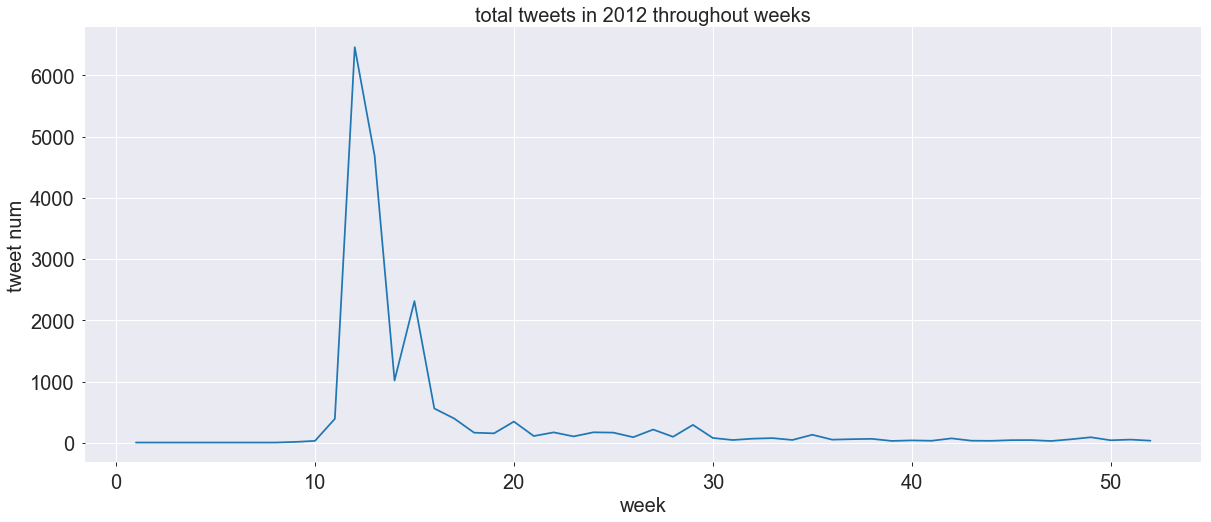

In [454]:
import matplotlib.pyplot as plt
import pandas as pd
plt.figure(figsize=(20,8))
plt.title('total tweets in 2012 throughout weeks',size=20)
plt.xlabel('week in 2012',size=20)
plt.ylabel('tweet num',size=20)
# gca stands for 'get current axis'
ax = plt.gca()
all_res.plot(kind='line',ax=ax,fontsize=20)

In [455]:
anx_res=anx_week['message'].count()
# anx_res

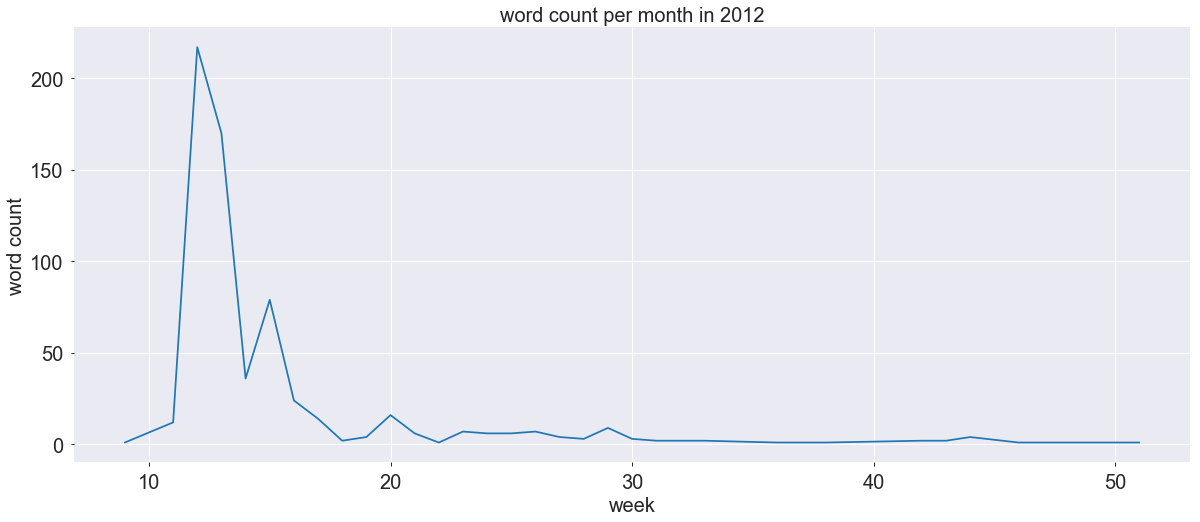

In [456]:
import matplotlib.pyplot as plt
import pandas as pd
plt.figure(figsize=(20,8))
plt.title('word count per month in 2012',size=20)
plt.xlabel('week in 2012',size=20)
plt.ylabel('word count',size=20)
# gca stands for 'get current axis'
ax = plt.gca()

anx_res.plot(kind='line',ax=ax,fontsize=20)


### store count results for anxiety message and tweets

In [457]:
anxlist=[]
for week,val in anx_res.items():
    anxlist.append((week,val))
alltweetlist=[]
for week,val in all_res.items():
    alltweetlist.append((week,val))

### store fraction of anxiety message per week in final

In [458]:
final0=[]
for i in range(1,53):
    for week1,anxnum in anxlist:
        if week1!=i:
            final0.append((i,0))
            continue
        for week2,tweetnum in alltweetlist:
            if week1==week2:
                final0.append((week1,100*anxnum/tweetnum))
                continue
final0=list(set(final))
final0.sort()
final0

[(1, 0),
 (2, 0),
 (3, 0),
 (4, 0),
 (5, 0),
 (6, 0),
 (7, 0),
 (8, 0),
 (9, 0),
 (9, 7.142857142857143),
 (10, 0),
 (11, 0),
 (11, 3.0690537084398977),
 (12, 0),
 (12, 3.3591331269349847),
 (13, 0),
 (13, 3.6286019210245466),
 (14, 0),
 (14, 3.536345776031434),
 (15, 0),
 (15, 3.4154777345438823),
 (16, 0),
 (16, 4.285714285714286),
 (17, 0),
 (17, 3.5353535353535355),
 (18, 0),
 (18, 1.2121212121212122),
 (19, 0),
 (19, 2.5974025974025974),
 (20, 0),
 (20, 4.624277456647399),
 (21, 0),
 (21, 5.454545454545454),
 (22, 0),
 (22, 0.5882352941176471),
 (23, 0),
 (23, 6.730769230769231),
 (24, 0),
 (24, 3.508771929824561),
 (25, 0),
 (25, 3.6144578313253013),
 (26, 0),
 (26, 7.6923076923076925),
 (27, 0),
 (27, 1.8518518518518519),
 (28, 0),
 (28, 3.061224489795918),
 (29, 0),
 (29, 3.0821917808219177),
 (30, 0),
 (30, 3.7974683544303796),
 (31, 0),
 (31, 4.444444444444445),
 (32, 0),
 (33, 0),
 (33, 2.6315789473684212),
 (34, 0),
 (35, 0),
 (36, 0),
 (36, 1.9607843137254901),
 (37, 0),
 

### remove invalid value

In [459]:
final1={}
for a,b in final0:
    if a not in final1:
        final1[a]=b
    else:
        final1[a]+=b

In [460]:
len(final1)

52

In [461]:
final1

{1: 0,
 2: 0,
 3: 0,
 4: 0,
 5: 0,
 6: 0,
 7: 0,
 8: 0,
 9: 7.142857142857143,
 10: 0,
 11: 3.0690537084398977,
 12: 3.3591331269349847,
 13: 3.6286019210245466,
 14: 3.536345776031434,
 15: 3.4154777345438823,
 16: 4.285714285714286,
 17: 3.5353535353535355,
 18: 1.2121212121212122,
 19: 2.5974025974025974,
 20: 4.624277456647399,
 21: 5.454545454545454,
 22: 0.5882352941176471,
 23: 6.730769230769231,
 24: 3.508771929824561,
 25: 3.6144578313253013,
 26: 7.6923076923076925,
 27: 1.8518518518518519,
 28: 3.061224489795918,
 29: 3.0821917808219177,
 30: 3.7974683544303796,
 31: 4.444444444444445,
 32: 0,
 33: 2.6315789473684212,
 34: 0,
 35: 0,
 36: 1.9607843137254901,
 37: 1.694915254237288,
 38: 1.5625,
 39: 0,
 40: 0,
 41: 0,
 42: 2.7777777777777777,
 43: 5.882352941176471,
 44: 12.5,
 45: 0,
 46: 2.272727272727273,
 47: 3.4482758620689653,
 48: 0,
 49: 0,
 50: 0,
 51: 1.9230769230769231,
 52: 0}

In [462]:
anxiety_tb=pd.DataFrame(list(final1.items()), columns=['week', 'anxiety%'])
anxiety_tb

,week,anxiety%
0,1,0.000000
1,2,0.000000
2,3,0.000000
3,4,0.000000
4,5,0.000000
5,6,0.000000
6,7,0.000000
7,8,0.000000
8,9,7.142857
9,10,0.000000


### plot fraction of anxiety in tweets

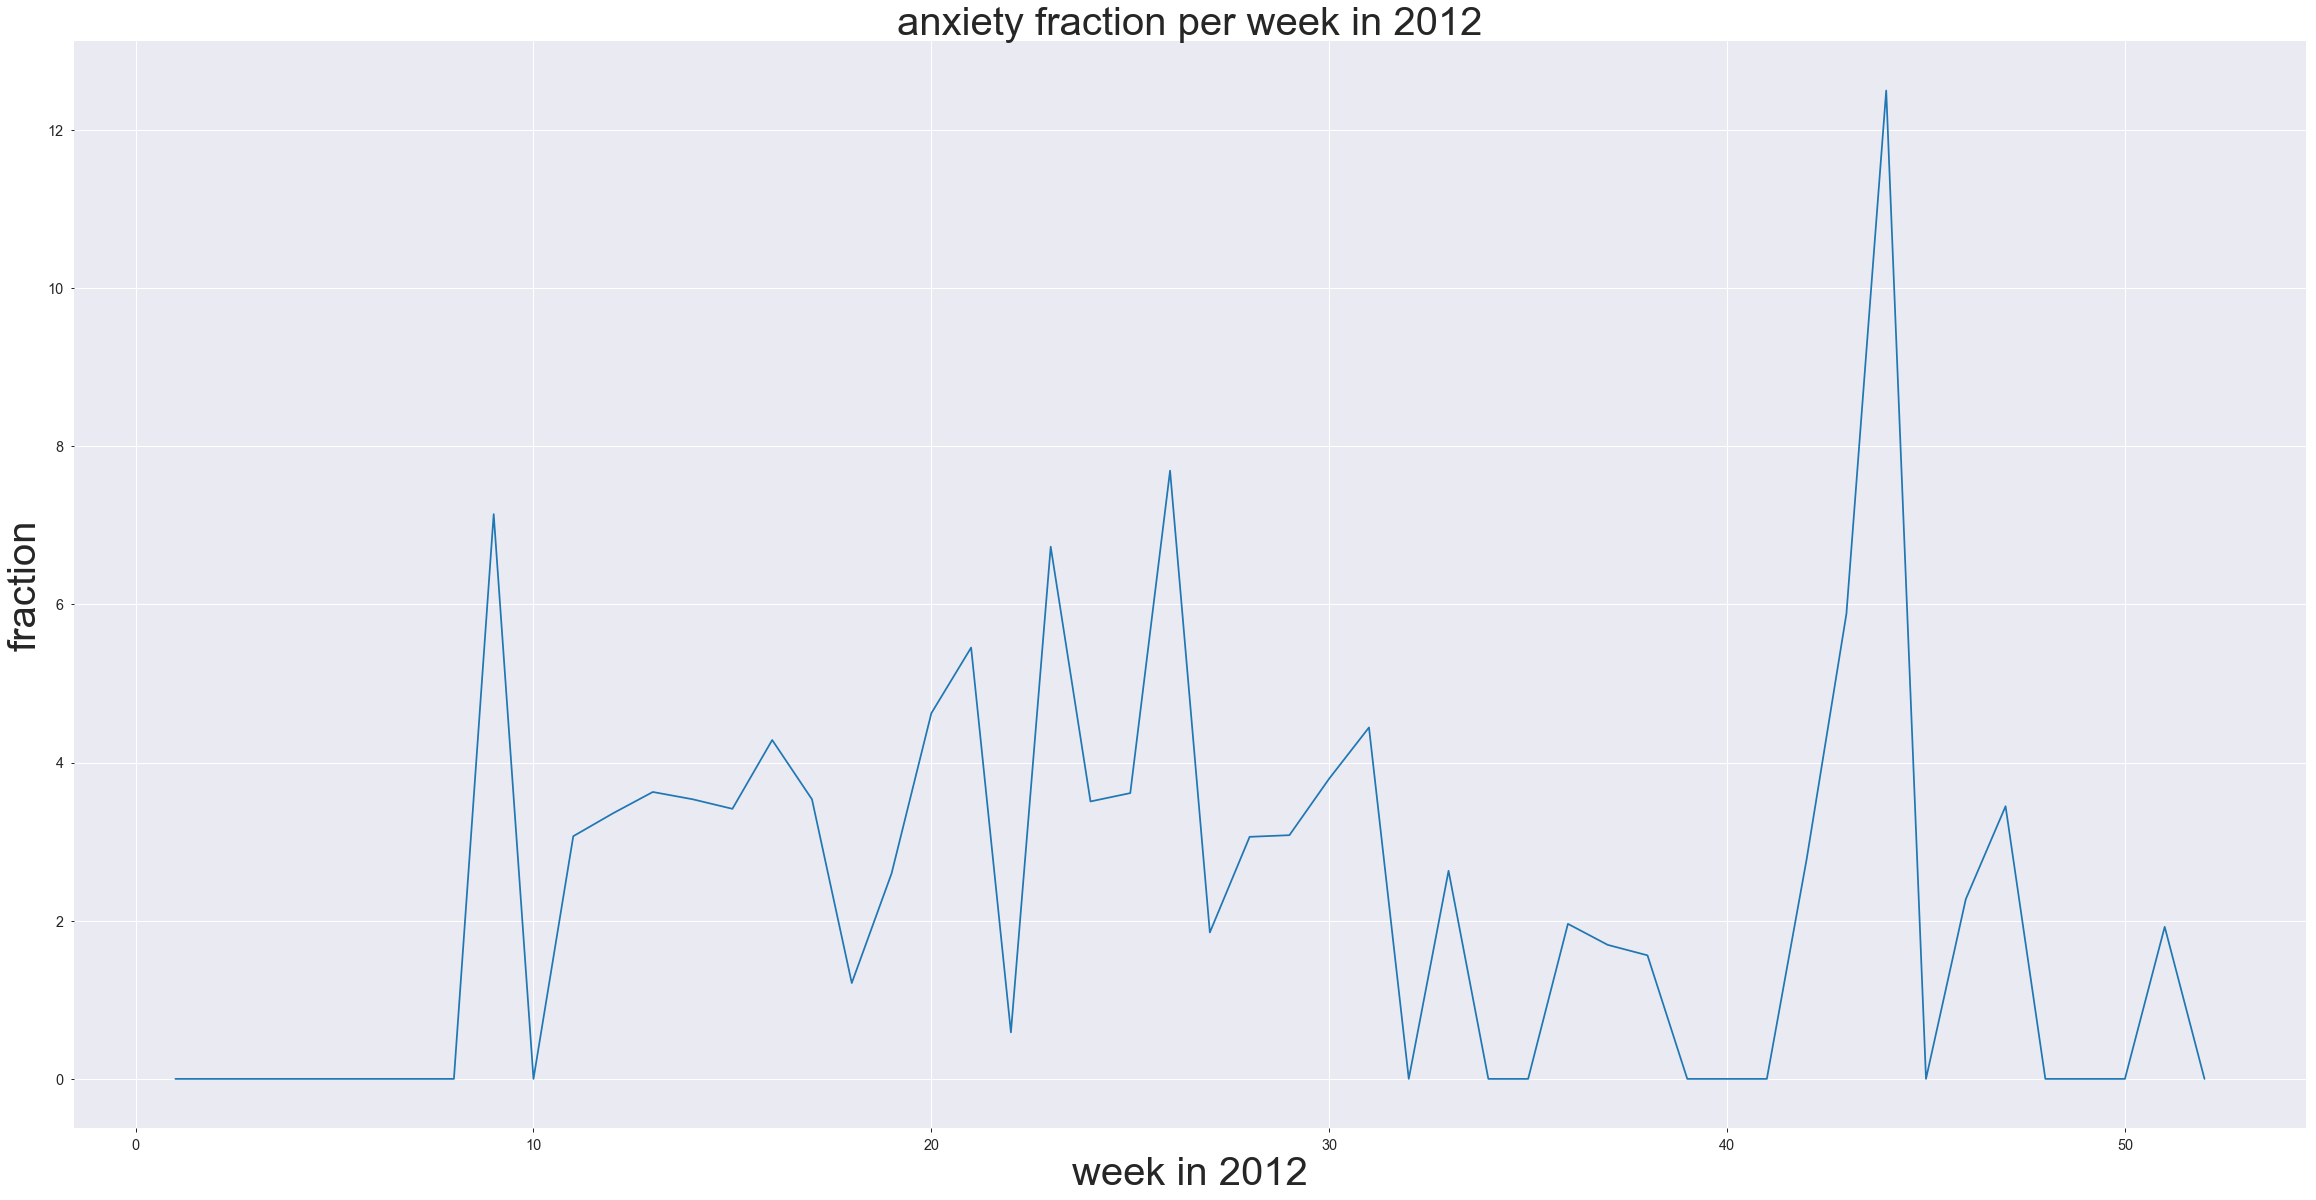

In [385]:
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}

pylab.rcParams.update(params)

import pandas as pd
plt.figure(figsize=(40,20))
plt.title('anxiety fraction per week in 2012',size=40)
plt.xlabel('week in 2012',size=40)
plt.ylabel('fraction',size=40)
# gca stands for 'get current axis'
ax = plt.gca()
lists = sorted(final2.items()) # sorted by key, return a list of tuples

x, y = zip(*lists) # unpack a list of pairs into two tuples
plt.plot(x,y)

In [366]:
# import matplotlib.pyplot as plt
# plt.figure(figsize=(40,20))
# plt.title('% anxiety tweets in 2012 throughout weeks',size=40)
# plt.xlabel('week in 2012',size=40)
# plt.ylabel('anxiety tweets fraction',size=40)

# x_val = [x[0] for x in final]
# y_val = [x[1] for x in final]

# plt.plot(x_val,y_val)
# plt.plot(x_val,y_val,'or')
# plt.show()

### negative

In [390]:
def check_neg(s):
    for word in LIWC_dict['Negemo']:
        if word in s:
            return 'neg'
    return 'NA'
    

In [401]:
# LIWC_dict['Negemo']

In [391]:
data_msg_time2012['tag2'] = data_msg_time2012.apply(lambda x: check_neg(x['message']), axis=1)
data_msg_time2012.head()

,date_posted_gmt,message,date,year,month,day,week,tag,tag2
0,4/11/12 19:35,Is tweeting every minute too much? Not hating ...,2012-04-11 19:35:00,2012,4,11,15,NA,neg
1,3/25/12 18:04,Trayvon Martin's killer George Zimmerman: 407-...,2012-03-25 18:04:00,2012,3,25,12,NA,NA
4,4/12/12 15:25,Special Prosecutor Angela Corey charges George...,2012-04-12 15:25:00,2012,4,12,15,NA,neg
7,3/28/12 23:03,WE live in America where a girl that threw flo...,2012-03-28 23:03:00,2012,3,28,13,NA,NA
8,3/24/12 23:13,"Monday, March 26th, 2012 is National Hoodie Da...",2012-03-24 23:13:00,2012,3,24,12,NA,NA


In [463]:
data_msg_time2012.groupby('tag2').count()


,date_posted_gmt,message,date,year,month,day,week,tag
tag2,,,,,,,,
NA,14913,14913,14913,14913,14913,14913,14913,14913
neg,4294,4294,4294,4294,4294,4294,4294,4294


In [464]:
neg_week=data_msg_time2012[data_msg_time2012['tag2']=='neg'].groupby('week')
neg_res=neg_week['message'].count()
# neg_week

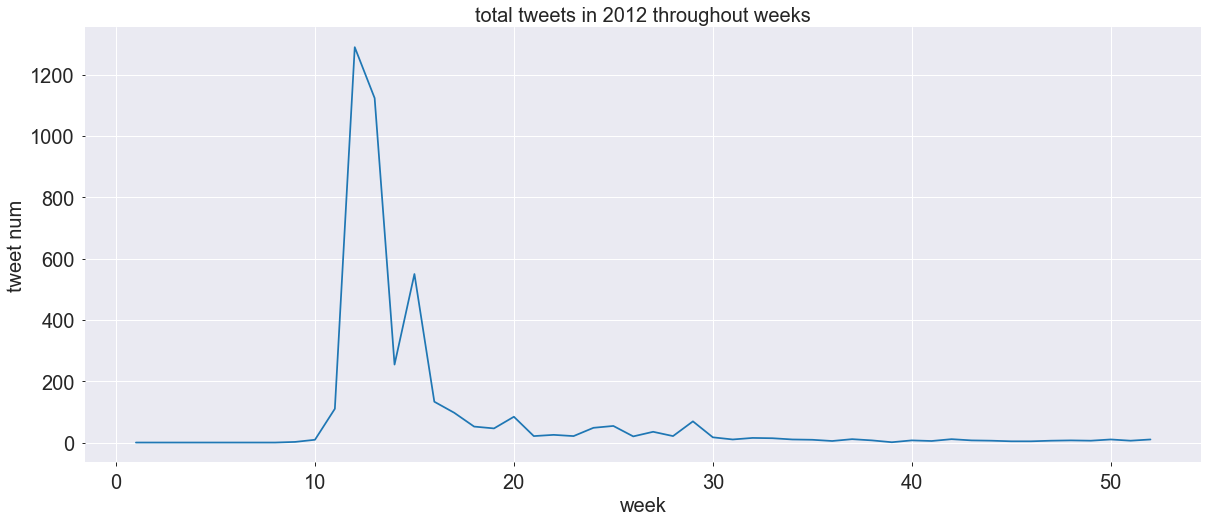

In [465]:
import matplotlib.pyplot as plt
import pandas as pd
plt.figure(figsize=(20,8))
plt.title('total tweets in 2012 throughout weeks',size=20)
plt.xlabel('week in 2012',size=20)
plt.ylabel('tweet num',size=20)
# gca stands for 'get current axis'
ax = plt.gca()
neg_res.plot(kind='line',ax=ax,fontsize=20)

In [466]:
neglist=[]
for week,val in neg_res.items():
    neglist.append((week,val))
# alltweetlist=[]
# for week,val in all_res.items():
#     alltweetlist.append((week,val))

In [467]:
final=[]
for i in range(1,53):
    for week1,negnum in neglist:
        if week1!=i:
            final.append((i,0))
            continue
        for week2,tweetnum in alltweetlist:
            if week1==week2:
                final.append((week1,100*negnum/tweetnum))
                continue
final=list(set(final))
final.sort()
# final

In [468]:
final2={}
for a,b in final:
    if a not in final2:
        final2[a]=b
    else:
        final2[a]+=b

In [469]:
final2

{1: 25.0,
 2: 0,
 3: 0,
 4: 0,
 5: 0,
 6: 0,
 7: 0,
 8: 25.0,
 9: 21.428571428571427,
 10: 32.25806451612903,
 11: 28.388746803069054,
 12: 19.953560371517028,
 13: 23.970117395944502,
 14: 25.04911591355599,
 15: 23.778642455685258,
 16: 23.928571428571427,
 17: 24.747474747474747,
 18: 32.121212121212125,
 19: 30.51948051948052,
 20: 24.566473988439306,
 21: 20.0,
 22: 15.294117647058824,
 23: 21.153846153846153,
 24: 28.65497076023392,
 25: 33.13253012048193,
 26: 23.076923076923077,
 27: 16.666666666666668,
 28: 22.448979591836736,
 29: 23.972602739726028,
 30: 22.78481012658228,
 31: 24.444444444444443,
 32: 23.880597014925375,
 33: 19.736842105263158,
 34: 23.91304347826087,
 35: 7.633587786259542,
 36: 11.764705882352942,
 37: 20.338983050847457,
 38: 12.5,
 39: 6.666666666666667,
 40: 20.512820512820515,
 41: 18.181818181818183,
 42: 16.666666666666668,
 43: 23.529411764705884,
 44: 21.875,
 45: 11.627906976744185,
 46: 11.363636363636363,
 47: 24.137931034482758,
 48: 14.03508

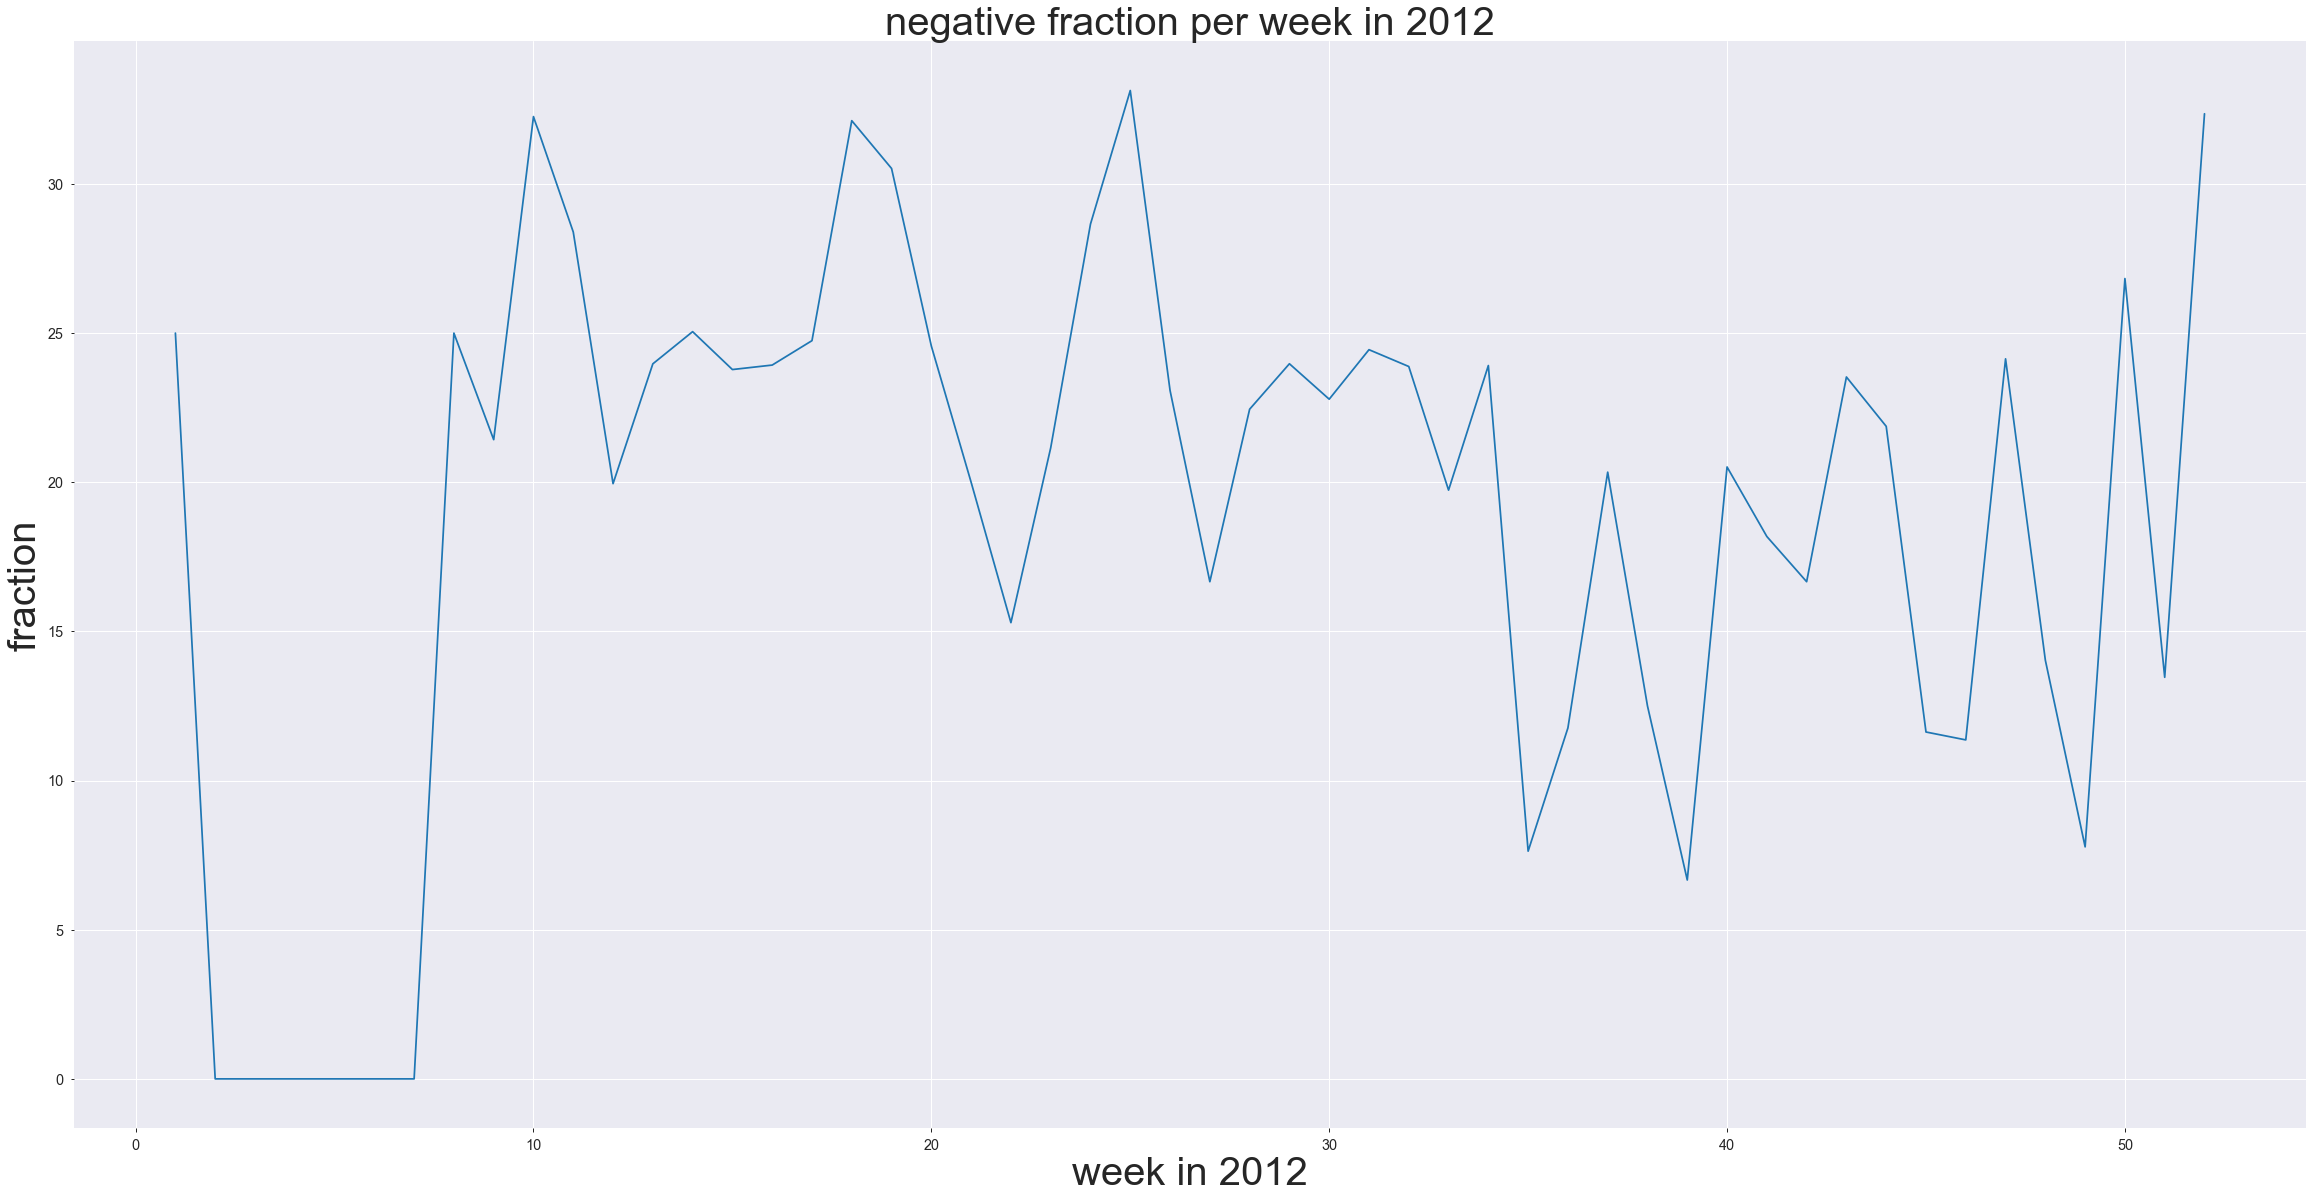

In [470]:
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}

pylab.rcParams.update(params)

import pandas as pd
plt.figure(figsize=(40,20))
plt.title('negative fraction per week in 2012',size=40)
plt.xlabel('week in 2012',size=40)
plt.ylabel('fraction',size=40)
# gca stands for 'get current axis'
ax = plt.gca()
lists = sorted(final2.items()) # sorted by key, return a list of tuples

x, y = zip(*lists) # unpack a list of pairs into two tuples
plt.plot(x,y)

### compare anxiety and negative

In [471]:
negative_tb=pd.DataFrame(list(final2.items()), columns=['week', 'negative%'])

In [472]:
vs_tb=pd.concat([anxiety_tb, negative_tb], axis=1, sort=False)
vs_tb=vs_tb.drop(vs_tb['week'], axis=1)
vs_tb.insert(0, 'week', range(1, 53))
vs_tb

,week,anxiety%,negative%
0,1,0.000000,25.000000
1,2,0.000000,0.000000
2,3,0.000000,0.000000
3,4,0.000000,0.000000
4,5,0.000000,0.000000
5,6,0.000000,0.000000
6,7,0.000000,0.000000
7,8,0.000000,25.000000
8,9,7.142857,21.428571
9,10,0.000000,32.258065


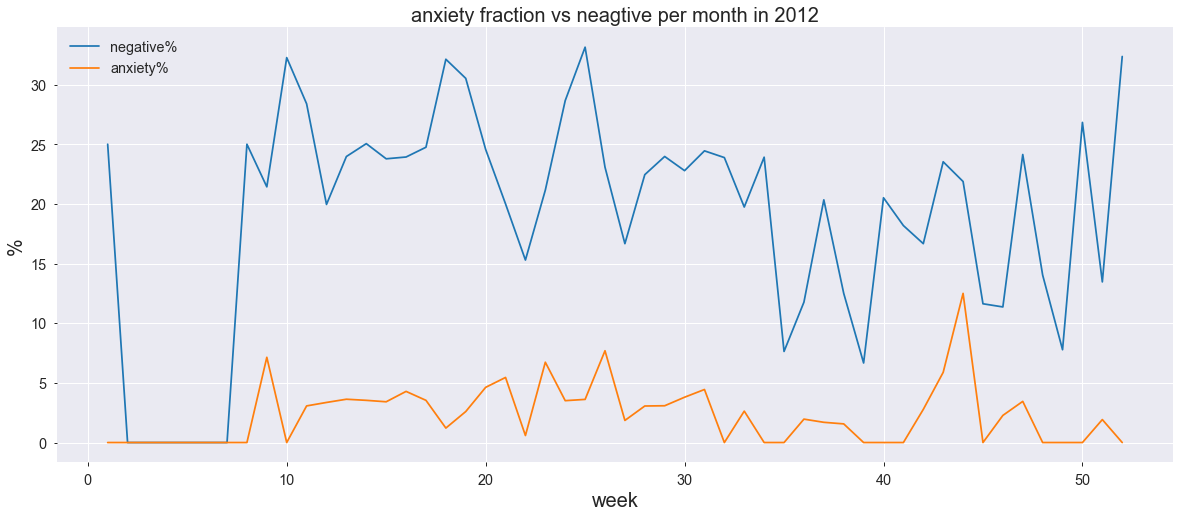

In [475]:
plt.figure(figsize=(20,8))
plt.title('anxiety fraction vs neagtive per month in 2012',size=20)
plt.xlabel('month in 2012',size=20)
plt.ylabel('%',size=20)
# gca stands for 'get current axis'
ax = plt.gca()
vs_tb.plot(kind='line',x='week',y='negative%',ax=ax)
vs_tb.plot(kind='line',x='week',y='anxiety%', ax=ax)